# PyData Carolinas 2016 Tutorial (Refactored)

In [1]:
%matplotlib inline

from datetime import date, datetime, timedelta

import matplotlib.pyplot as plt, mpld3
import numpy as np
import pandas as pd
from stemgraphic import stem_graphic

### Getting the data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/softporcupine/pandas-matplotlib-example/master/home_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Preliminary data munging

In [4]:
df['renovated'] = df.yr_renovated>=1

In [5]:
df.drop('date', axis=1, inplace=True)

In [6]:
df.shape

(21613, 21)

In [7]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated'],
      dtype='object')

## Our target: price

Let's first look at the distribution of price before we look at features

(<matplotlib.figure.Figure at 0x7f06a085e9e8>,
 <matplotlib.axes._axes.Axes at 0x7f06a0ecb438>)

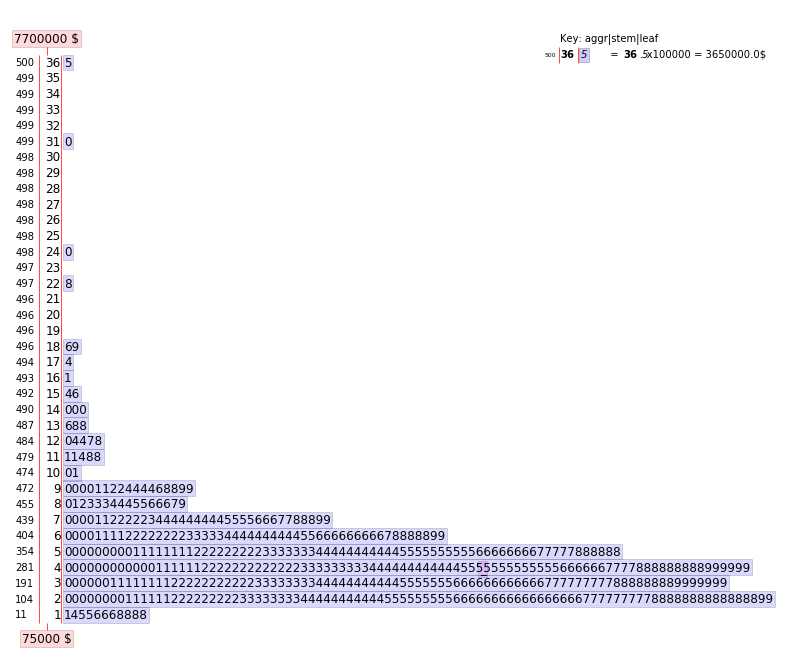

In [8]:
stem_graphic(df.price, display=500, unit='$')

## Features

Some features are really indicators (like waterfront) and most are not continuous, but can be used as such. Afterall, you can have 2.5 baths or 1.5 floors...

In [9]:
import seaborn as sns

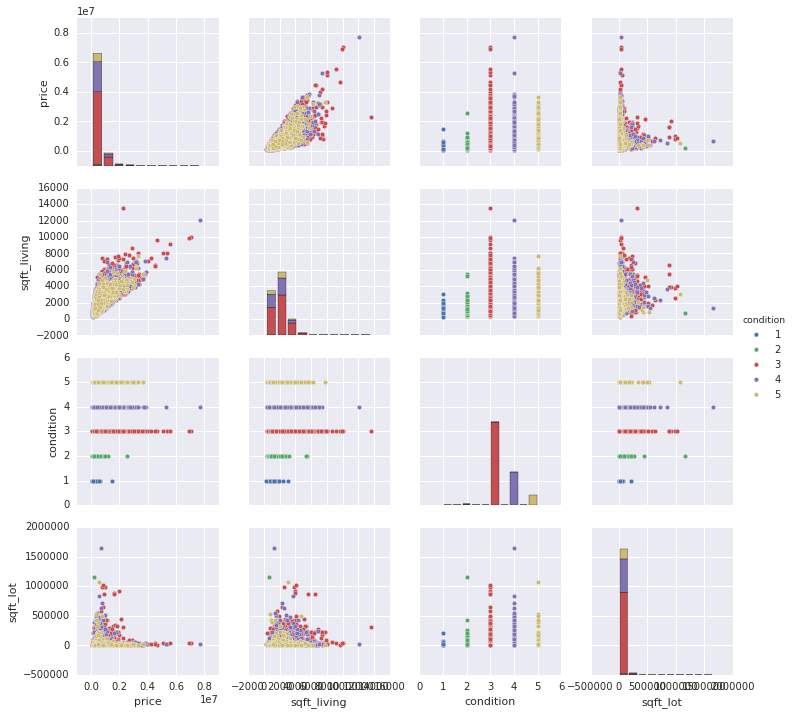

In [10]:
sns.pairplot(df[['price', 'sqft_living', 'condition', 'sqft_lot']], hue='condition')

Square footage is probably a good indicator of price...

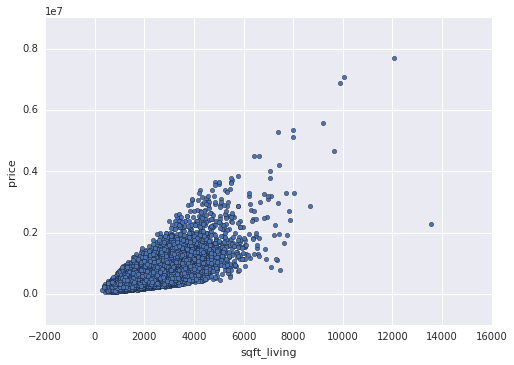

In [11]:
df.plot(x='sqft_living', y='price', kind='scatter')

Although, in real estate, it's all about LOCATION, LOCATION and LOCATION! Is that really the case?

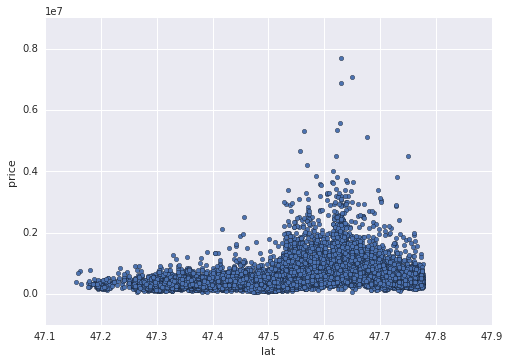

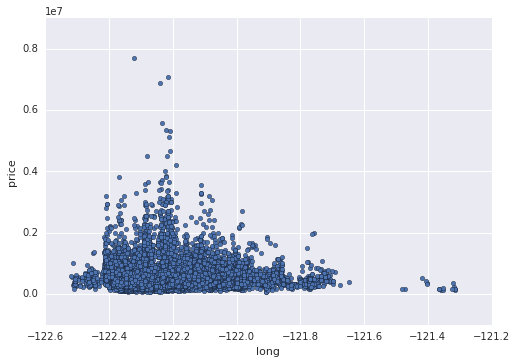

In [12]:
df.plot(x='lat', y='price', kind='scatter')
df.plot(x='long', y='price', kind='scatter')

### Creating derived data

In [13]:
df['lat_from_center'] = (47.62 - df.lat).abs()
df['long_from_center'] = (-122.32 - df.long).abs()

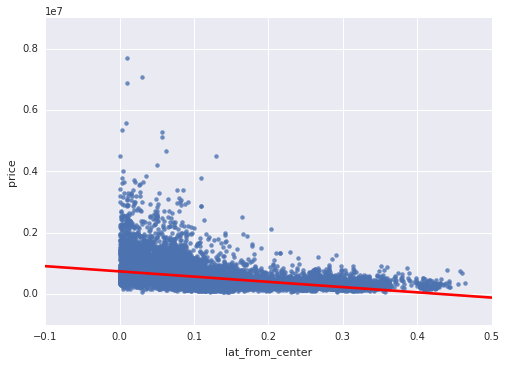

In [14]:
sns.regplot(x='lat_from_center', y='price', data=df, line_kws={'color':'r'})

In [15]:
df_np = df.drop(['price', 'lat', 'long'], axis=1)

## Model

### Simple Linear regression

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
X = df[['sqft_living', 'condition']]

In [18]:
lr = LinearRegression()
lr.fit(X[::2], df.price[::2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
lr.intercept_

-214216.30529292324

In [20]:
lr.coef_

array([   292.81216765,  43037.62951553])

In [21]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_from_center,long_from_center
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,...,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,0.119342,0.130058
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,...,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.092470,0.119060
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,0.053300,0.036000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,0.092400,0.093000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,...,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,0.154200,0.195000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,0.464100,1.005000


Average values were:
<pre>
price         bedrooms  bathrooms  sqft_living  sqft_lot      floors    waterfront  view      condition
5.400881e+05  3.370842  2.114757   2079.899736  1.510697e+04  1.494309  0.007542    0.234303  3.409430
condition = 3.41
sqft = 2079.90
</pre>

And so we will use the average sqft and condition as default arguments.

The equation for this linear regression is:
<pre>
lr.intercept_ + lr.coef_[0] \* sqft + lr.coef_[1] \* condition
</pre>
Since we will not have the lr model here in this first example, we need to use the real values. This is a simple equation with 3 values, so that is not a problem. We'll see further down how to deal with more complex models.

In [22]:
# The function we will use in our web application

def ballpark_estimator(sqft=2080, condition=3.4):
    return -214216.30529291916 + 292.81216765 * sqft + 43037.62951553 * condition

In [23]:
lr.score(X[1::2], df.price[1::2])

0.48561791126108467

This information will not be available to the web application. How can we carry this with us? And when was the model built, anyway?

### More detailed model

In [24]:
from sklearn.feature_selection import RFE
from sklearn.cross_validation import train_test_split

In [25]:
lr = LinearRegression()
rfe = RFE(lr, 6)
rfe = rfe.fit(df_np, df.price)

In [26]:
print(df_np.columns)

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'sqft_living15',
       'sqft_lot15', 'renovated', 'lat_from_center', 'long_from_center'],
      dtype='object')


In [27]:
print(df_np.columns[rfe.support_])
print(rfe.ranking_)
print(rfe.support_)

Index(['sqft_living', 'waterfront', 'sqft_above', 'sqft_basement',
       'lat_from_center', 'long_from_center'],
      dtype='object')
[15  7  8  1 13  6  1  4  5  3  1  1 10  9 11 12 14  2  1  1]
[False False False  True False False  True False False False  True  True
 False False False False False False  True  True]


In [28]:
X = df[df_np.columns[rfe.support_]]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, df.price, test_size=0.25, random_state=42)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Metrics

Storing a few extra piece of informations in our model

In [31]:
lr.version = datetime.today()

In [32]:
lr.cv = lr.score(X_test, y_test)

In [33]:
print(lr.version, lr.cv)

2016-09-09 18:43:10.887390 0.677717152612


So that way we know the score... literally.

Refactoring to use in our web applicaiton. Well, not really a refactoring, simply persisting the model to disk:

In [34]:
from sklearn.externals import joblib

In [35]:
joblib.dump(lr, 'trained_models/lr.pkl') 

['trained_models/lr.pkl',
 'trained_models/lr.pkl_01.npy',
 'trained_models/lr.pkl_02.npy']

### Visualisation

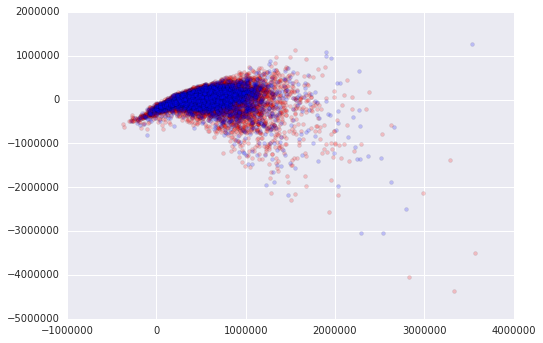

In [36]:
ax = plt.scatter(lr.predict(X_train), lr.predict(X_train) - y_train, c='r', s=15, alpha=0.2)
plt.scatter(lr.predict(X_test), lr.predict(X_test) - y_test, c='b', s=15, alpha=0.2)

For the above, we need 4 variables:
<pre>
    X_train and y_train, X_test and y_test
</pre>

This is unusual to use the data like this, but here our visualization is to provide a better insight into how well the model works with both the training set and the test set. joblib to the rescue, once again.

In [37]:
joblib.dump(X_train, 'data/X_train.pkl') 
joblib.dump(y_train, 'data/y_train.pkl') 
joblib.dump(X_test, 'data/X_test.pkl') 
joblib.dump(y_test, 'data/y_train.pkl') 

['data/y_train.pkl',
 'data/y_train.pkl_01.npy',
 'data/y_train.pkl_02.npy',
 'data/y_train.pkl_03.npy',
 'data/y_train.pkl_04.npy']

The other thing we will need in the web application itself is a variation on the matplotlib import:
    <pre>
    import matplotlib
    matplotlib.use('Agg')
    import matplotlib.pyplot as plt, mpld3
    </pre>
And we will need to output into something that can be embedded in a web page. In this case, a dynamic svg chart, thanks to mpld3:
    <pre>
    dataviz = mpld3.fig_to_html(ax.get_figure())
    </pre>

# Questions?

You can always hit me up on twitter: <a href="https://twitter/com/f_dion" target="_blank">@f_dion</a>